# Model evaluation using fast ai tools

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.widgets import *
import convert

In [3]:
def most_confused_to_df(most_confused_list):
    most_confused_dict = {
        "actual": [],
        "predicted": [],
        "number_of_occurrences": [],
    }

    for entry in most_confused_list:
        most_confused_dict["actual"].append(convert.convert_label_to_description[entry[0]])
        most_confused_dict["predicted"].append(convert.convert_label_to_description[entry[1]])
        most_confused_dict["number_of_occurrences"].append(entry[2])
    
    return DataFrame(most_confused_dict)
    

### Evaluate model trained on dataset full dataset

In [4]:
CONFIG = {
    "dir_dataset": Path("./dataset"),
    "dir_images": Path("./dataset/images"),
    "trained_weights": "resnet50_unfreeze_img_size_252_DDD-28",
    "validation_set": "valid.txt",
    "model": models.resnet50,
    "metric": [error_rate, accuracy],
    "img_size": 252,
    "batch_size": 64,
}

In [5]:
# function for getting label information out of train file name
# Example: p002_c0_img_3370 -> c0
get_y_fn = lambda x: x.stem.split("_")[1]

In [6]:
# create Databunch
data = (ImageList.from_folder(CONFIG["dir_dataset"])
        .split_by_fname_file(CONFIG["validation_set"])
        .label_from_func(get_y_fn)
        .transform(get_transforms(do_flip=False), size=CONFIG["img_size"])
        .databunch(bs=CONFIG["batch_size"])
        .normalize(imagenet_stats)
    )

In [7]:
learn = cnn_learner(data, CONFIG["model"], metrics=CONFIG["metric"])

In [8]:
learn.load(CONFIG["trained_weights"]) ;

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

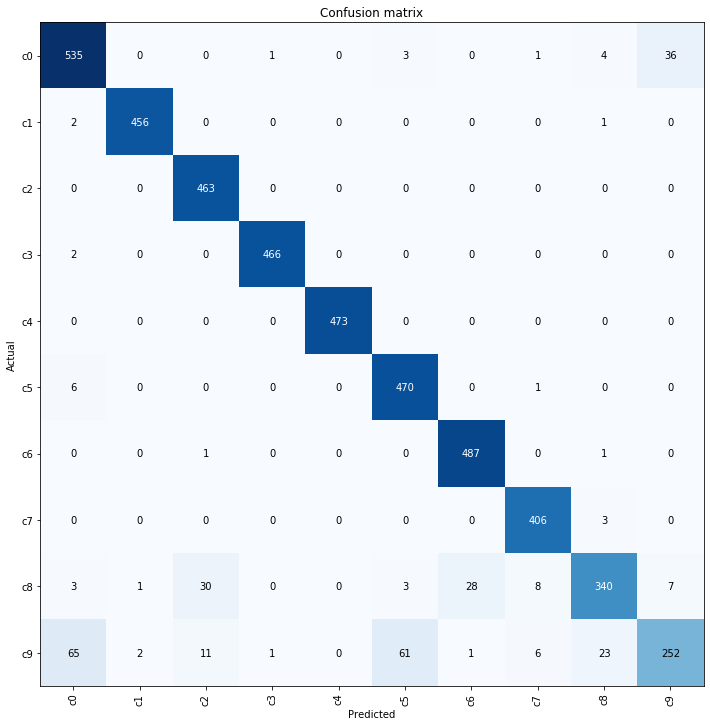

In [10]:
interp.plot_confusion_matrix(figsize=(10,10))

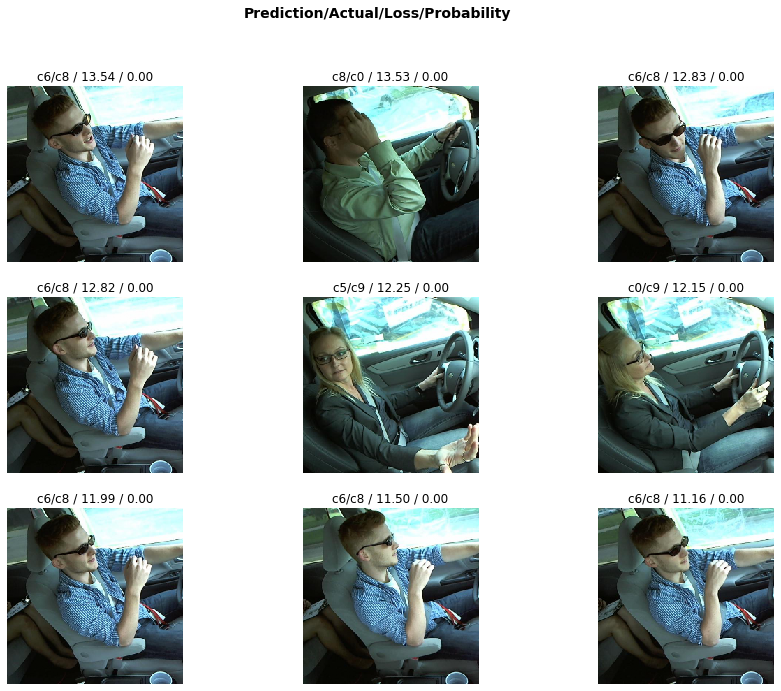

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

In [12]:
convert.convert_label_to_description

{'c0': 'safe driving',
 'c1': 'texting - right',
 'c2': 'talking on the phone - right',
 'c3': 'texting - left',
 'c4': 'talking on the phone - left',
 'c5': 'operating the radio',
 'c6': 'drinking',
 'c7': 'reaching behind',
 'c8': 'hair and makeup',
 'c9': 'talking to passenger'}

In [13]:
most_confused_list = interp.most_confused(min_val=2)
most_confused_to_df(most_confused_list)

,actual,predicted,number_of_occurrences
0,talking to passenger,safe driving,65
1,talking to passenger,operating the radio,61
2,safe driving,talking to passenger,36
3,hair and makeup,talking on the phone - right,30
4,hair and makeup,drinking,28
5,talking to passenger,hair and makeup,23
6,talking to passenger,talking on the phone - right,11
7,hair and makeup,reaching behind,8
8,hair and makeup,talking to passenger,7
9,operating the radio,safe driving,6


### Evaluate model trained on dataset without C9

In [14]:
CONFIG = {
    "dir_dataset": Path("./clean_dataset"),
    "dir_images": Path("./clean_dataset/images"),
    "trained_weights": "resnet34_unfreeze_img_size_252_DDD-36",
    "validation_set": "valid.txt",
    "model": models.resnet34,
    "metric": [error_rate, accuracy],
    "img_size": 252,
    "batch_size": 64,
}

In [15]:
# create Databunch
data = (ImageList.from_folder(CONFIG["dir_dataset"])
        .split_by_fname_file(CONFIG["validation_set"])
        .label_from_func(get_y_fn)
        .transform(get_transforms(do_flip=False), size=CONFIG["img_size"])
        .databunch(bs=CONFIG["batch_size"])
        .normalize(imagenet_stats)
    )

In [16]:
learn = cnn_learner(data, CONFIG["model"], metrics=CONFIG["metric"])

In [17]:
learn.load(CONFIG["trained_weights"]) ;

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

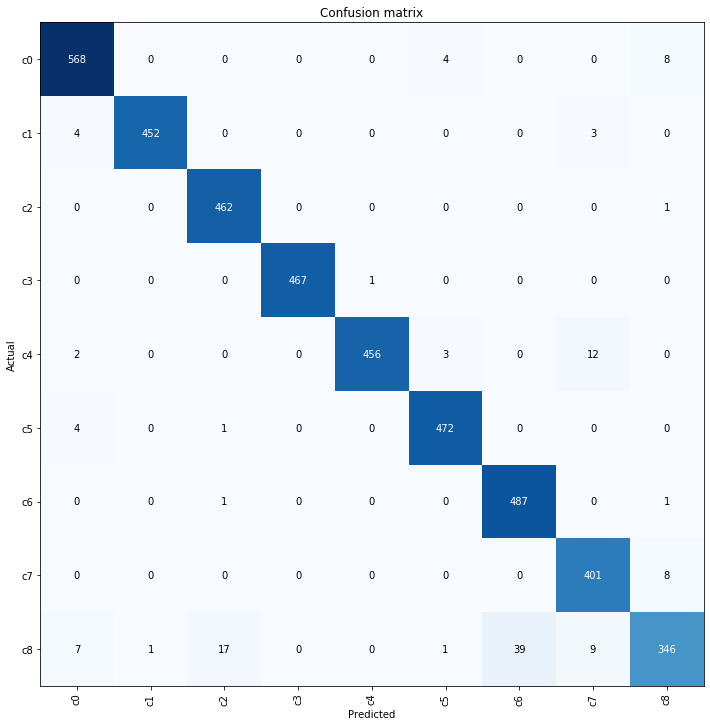

In [19]:
interp.plot_confusion_matrix(figsize=(10,10))

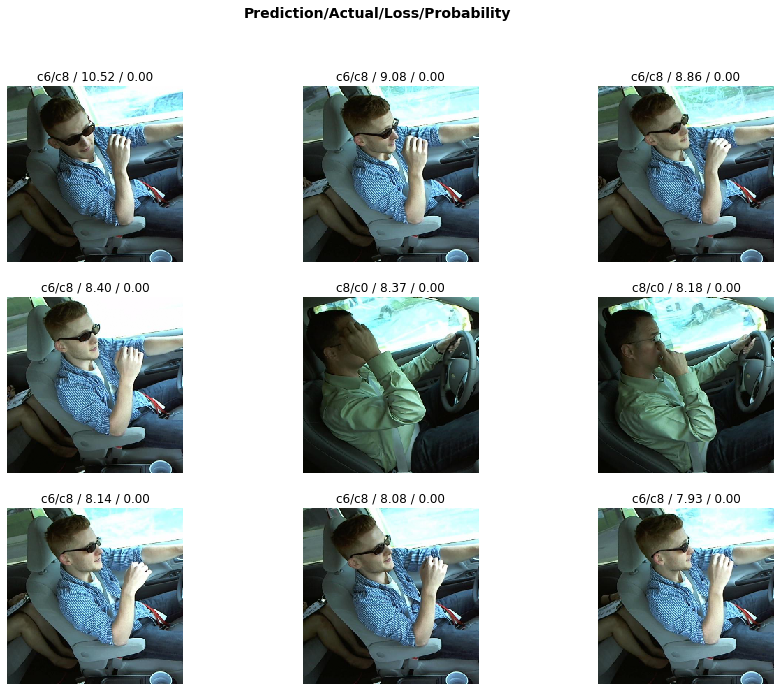

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

In [21]:
convert.convert_label_to_description

{'c0': 'safe driving',
 'c1': 'texting - right',
 'c2': 'talking on the phone - right',
 'c3': 'texting - left',
 'c4': 'talking on the phone - left',
 'c5': 'operating the radio',
 'c6': 'drinking',
 'c7': 'reaching behind',
 'c8': 'hair and makeup',
 'c9': 'talking to passenger'}

In [22]:
most_confused_list = interp.most_confused(min_val=2)

In [23]:
most_confused_to_df(most_confused_list)

,actual,predicted,number_of_occurrences
0,hair and makeup,drinking,39
1,hair and makeup,talking on the phone - right,17
2,talking on the phone - left,reaching behind,12
3,hair and makeup,reaching behind,9
4,safe driving,hair and makeup,8
5,reaching behind,hair and makeup,8
6,hair and makeup,safe driving,7
7,safe driving,operating the radio,4
8,texting - right,safe driving,4
9,operating the radio,safe driving,4


In [24]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [25]:
ImageCleaner(ds, idxs, CONFIG["dir_dataset"])

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [26]:
convert.convert_label_to_description

{'c0': 'safe driving',
 'c1': 'texting - right',
 'c2': 'talking on the phone - right',
 'c3': 'texting - left',
 'c4': 'talking on the phone - left',
 'c5': 'operating the radio',
 'c6': 'drinking',
 'c7': 'reaching behind',
 'c8': 'hair and makeup',
 'c9': 'talking to passenger'}